# Start Up


In [1]:
Path = "/Users/jonasserry/Google Drive/GDFT-Net"

import sys
sys.path.append(Path+"/Core")

from Core import GDFT_Data
import numpy as np
import matplotlib.pyplot as plt

import GDFT_Sim

Data Version: 1.61


In [ ]:
from importlib import reload  
reload(GDFT_Data)

## Define Desired Params


In [2]:
params = None
params = {
"numChan": 32,
"dimensions": (512,64),
#"numSteps" : 25000,
"numSkip" : 20,
"numCoherent" : 16,
"numIncoherent" : 25,
"wavenumberRange" : (1.5,2.0),
"t0" : 10
}

#Warning: dimensions = (x,y) ---> stored in numpy as (y,x)
Incoh_to_dec_factor = 2


params["numSteps"] = int(params["dimensions"][0]*params["numCoherent"]*params["numIncoherent"]/Incoh_to_dec_factor)
print(params["numSteps"])

dec_factor = int(params["numSteps"]/params["dimensions"][0])
print(dec_factor)

102400
200


## Test Images

(64, 512, 1)


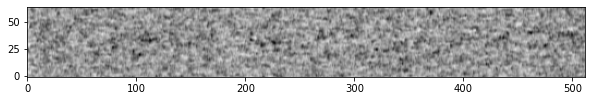

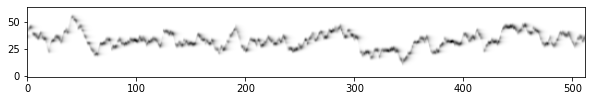

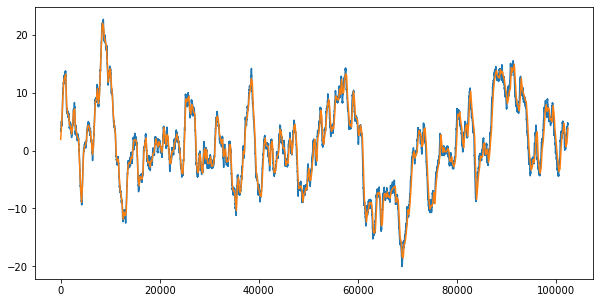

In [3]:
aspect = 1
delays = GDFT_Sim.von_karman_temporal_samples(1024*1024*8,t0 = params["t0"],T0=1e4, two_telescopes=True)[0:params["numSteps"]]
image,label,Label_1D = GDFT_Data.Create_Image_From_Delays(delays,SNR= 1.0,**params)
print(image.shape)
fs=(10,5)
plt.figure(figsize=fs)
plt.imshow(image[:,:,0], cmap=plt.get_cmap('gray_r'),origin="lower",aspect=aspect)
plt.figure(figsize=fs)
plt.imshow(label[:,:,0], cmap=plt.get_cmap('gray_r'),origin="lower",aspect=aspect)
plt.figure(figsize=fs)
plt.plot(delays/2/np.pi)

x = np.linspace(0,len(delays),len(Label_1D))
plt.plot(x,Label_1D)

In [ ]:
i=6
s=16
plt.figure(figsize=fs)
plt.imshow(image[:,i*s:i*s+s,0], cmap=plt.get_cmap('gray_r'),origin="lower",aspect=aspect)
plt.figure(figsize=fs)
plt.imshow(label[:,i*s:i*s+s,0], cmap=plt.get_cmap('gray_r'),origin="lower",aspect=aspect)

In [ ]:
Image, Label_2D, Label_1D = GDFT_Data.Create_Image(**params)
plt.figure()
plt.imshow(Image[:,:,0], cmap=plt.get_cmap('gray_r'),origin="lower",aspect=aspect)
plt.figure()
plt.imshow(Label_2D[:,:,0], cmap=plt.get_cmap('gray_r'),origin="lower",aspect=aspect)
plt.figure()
plt.plot(Label_1D)

## Determine SNR and t0 Structure

### Uniform Dist in SNR

In [ ]:
Nums = np.full(20,10)
SNRs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
print(Nums)
print(np.sum(Nums))

plt.figure()
plt.plot(SNRs,Nums)
plt.ylabel("Number of Samples")
plt.xlabel("SNR")



### Normal Dist in SNR

In [ ]:

import scipy.stats as stats

SNRs = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])

centered_at = 1.0
sigma = 0.6
NumImages = 500

Nums =  (stats.norm.pdf(SNRs,loc=centered_at ,scale = sigma)*NumImages).astype(int)

print(Nums)
print(np.sum(Nums))

plt.figure()
plt.plot(SNRs,Nums)
plt.ylabel("Number of Samples")
plt.xlabel("SNR")



## Create Data

In [ ]:
# Creating Single Set
id = "Set(16x64)(10000)"
DS = GDFT_Data.create_Data_Set(id,Nums,SNRs,**params)

In [ ]:
# Creating Multiple chopped sets
sets = GDFT_Data.create_Data_Sets("TestDATA(500): ",Nums,SNRs,t0=10, numSteps = 64000, y_dim=64,x_dims=[16,32,64,128,256,512], wavenumberRange=(1.5,2.0), numChan = 32, numCoherent=10, numIncoherent=25,numSkip=20)

## Inspect Data


In [ ]:
DS = sets[0]

In [ ]:
DS.plot_Image_at_Index(5028,aspect="auto",figsize=(5, 15))

## Save Data



In [ ]:
location = Path+"/Saved_Data/Training_Data/"
DS.save_As(location)

In [ ]:
location = Path+"/Saved_Data/Test_Data/"
for DS in set:
    DS.save_As(location)